In [1]:
# Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Get some basic information of the peers
slca_ticker = 'SLCA'
peers_tickers = ['RES', 'PUMP', 'WHD', 'CLB', 'CHX', 'PTEN', 'LBRT']

In [3]:
# Load the data
slca_income = pd.read_csv('data/income_statement_t.csv')
# Rename the unnamed column
slca_income.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
slca_income.dtypes
# Convert the date to datetime
slca_income['Date'] = pd.to_datetime(slca_income['Date'])
# Set the date as index
slca_income.set_index('Date', inplace=True)
slca_income.head()

,Tax Effect Of Unusual Items,Tax Rate For Calcs,Normalized EBITDA,Total Unusual Items,Total Unusual Items Excluding Goodwill,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,EBITDA,EBIT,...,Net Non Operating Interest Income Expense,Interest Expense Non Operating,Operating Income,Operating Expense,Depreciation Amortization Depletion Income Statement,Selling General And Administration,Gross Profit,Cost Of Revenue,Total Revenue,Operating Revenue
Date,,,,,,,,,,,,,,,,,,,,,
2023-12-31,0.000000e+00,0.250000,434537000.0,0.0,0.0,146925000.0,137259000.0,1.020627e+09,434537000.0,297278000.0,...,-101709000.0,101709000.0,275339000.0,256056000.0,137259000.0,118797000.0,531395000.0,1.020627e+09,1.552022e+09,1.552022e+09
2022-12-31,0.000000e+00,0.250000,321763000.0,0.0,0.0,78176000.0,140166000.0,1.070189e+09,321763000.0,181597000.0,...,-77598000.0,77598000.0,170954000.0,284004000.0,140166000.0,143838000.0,454958000.0,1.070189e+09,1.525147e+09,1.525147e+09
2021-12-31,-1.500998e+04,0.074307,195414000.0,-202000.0,-202000.0,-33761000.0,161131000.0,7.949830e+08,195212000.0,34081000.0,...,-71157000.0,71157000.0,28137000.0,280759000.0,161131000.0,119628000.0,308896000.0,7.949830e+08,1.103879e+09,1.103879e+09
2020-12-31,-3.793412e+07,0.342712,170994000.0,-110688000.0,-110688000.0,-114094000.0,155568000.0,5.750700e+08,60306000.0,-95262000.0,...,-79885000.0,79885000.0,-8924000.0,279739000.0,155568000.0,124171000.0,270815000.0,5.750700e+08,8.458850e+08,8.458850e+08


In [4]:
# Load the balance sheet
slca_balance = pd.read_csv('data/balance_sheet_t.csv')
# Rename the unnamed column
slca_balance.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
slca_balance.dtypes
# Convert the date to datetime
slca_balance['Date'] = pd.to_datetime(slca_balance['Date'])
# Set the date as index
slca_balance.set_index('Date', inplace=True)
slca_balance.head()

,Treasury Shares Number,Ordinary Shares Number,Share Issued,Net Debt,Total Debt,Tangible Book Value,Invested Capital,Working Capital,Net Tangible Assets,Capital Lease Obligations,...,Inventory,Finished Goods,Raw Materials,Receivables,Other Receivables,Accounts Receivable,Allowance For Doubtful Accounts Receivable,Gross Accounts Receivable,Cash Cash Equivalents And Short Term Investments,Cash And Cash Equivalents
Date,,,,,,,,,,,,,,,,,,,,,
2023-12-31,10777871.0,77192239.0,77192239.0,5.943210e+08,9.136950e+08,532275000.0,1.689345e+09,414894000.0,532275000.0,73658000.0,...,149429000.0,29865000.0,119564000.0,185917000.0,1051000.0,184866000.0,-5323000.0,190189000.0,245716000.0,245716000.0
2022-12-31,9892597.0,75738512.0,75738512.0,7.761480e+08,1.141244e+09,370227000.0,1.753678e+09,385334000.0,370227000.0,84251000.0,...,147626000.0,45779000.0,101847000.0,208631000.0,4639000.0,203992000.0,-5691000.0,209683000.0,280845000.0,280845000.0
2021-12-31,9712842.0,75033352.0,75033352.0,9.719950e+08,1.301019e+09,268512000.0,1.815635e+09,370044000.0,268512000.0,89599000.0,...,115713000.0,33579000.0,82134000.0,202759000.0,25015000.0,177744000.0,-5248000.0,182992000.0,239425000.0,239425000.0
2020-12-31,9156610.0,73986566.0,73986566.0,1.088782e+09,1.333451e+09,270029000.0,1.854962e+09,291418000.0,270029000.0,93749000.0,...,104684000.0,28632000.0,76052000.0,206934000.0,42308000.0,164626000.0,-6604000.0,171230000.0,150920000.0,150920000.0


In [5]:
# Load the cash flow
slca_cash = pd.read_csv('data/cash_flow_t.csv')
# Rename the unnamed column
slca_cash.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
slca_cash.dtypes
# Convert the date to datetime
slca_cash['Date'] = pd.to_datetime(slca_cash['Date'])
# Set the date as index
slca_cash.set_index('Date', inplace=True)
slca_cash.head()

,Free Cash Flow,Repurchase Of Capital Stock,Repayment Of Debt,Issuance Of Debt,Capital Expenditure,Interest Paid Supplemental Data,Income Tax Paid Supplemental Data,End Cash Position,Beginning Cash Position,Changes In Cash,...,Other Non Cash Items,Stock Based Compensation,Provisionand Write Offof Assets,Asset Impairment Charge,Deferred Tax,Deferred Income Tax,Depreciation Amortization Depletion,Operating Gains Losses,Gain Loss On Sale Of PPE,Net Income From Continuing Operations
Date,,,,,,,,,,,,,,,,,,,,,
2023-12-31,198398000.0,NaN,-200701000.0,NaN,-65470000.0,95133000.0,NaN,245716000.0,280845000.0,-35129000.0,...,14686000.0,14649000.0,-103000.0,0.0,35311000.0,35311000.0,137259000.0,-17951000.0,-17951000.0,146489000.0
2022-12-31,209154000.0,NaN,-166658000.0,0.0,-53562000.0,71235000.0,14809000.0,280845000.0,239425000.0,41420000.0,...,1947000.0,18364000.0,617000.0,0.0,20940000.0,20940000.0,140166000.0,-1005000.0,-1005000.0,77840000.0
2021-12-31,138830000.0,NaN,-44939000.0,NaN,-30517000.0,64650000.0,12994000.0,239425000.0,150920000.0,88505000.0,...,16559000.0,18809000.0,-455000.0,202000.0,-7493000.0,-7493000.0,161131000.0,-131000.0,-131000.0,-34321000.0
2020-12-31,-38320000.0,0.0,-23161000.0,25000000.0,-34917000.0,73695000.0,NaN,150920000.0,185740000.0,-34820000.0,...,-26575000.0,14911000.0,1510000.0,110688000.0,-61805000.0,-61805000.0,155568000.0,-2597000.0,-2597000.0,-115122000.0


In [6]:
# Load the peers data
chx_income = pd.read_csv('data/CHX_income_statement.csv')
chx_income_t = chx_income.T
# Rename the first column to date
chx_income_t.rename(columns=chx_income_t.iloc[0], inplace=True)
# Use the first row as the column names
chx_income_t.columns = chx_income_t.iloc[0]
# Drop the first row
chx_income_t.drop(chx_income_t.index[0], inplace=True)
# Convert the index to datetime
chx_income_t.index = pd.to_datetime(chx_income_t.index)
chx_income_t.head()

Unnamed: 0,Tax Effect Of Unusual Items,Tax Rate For Calcs,Normalized EBITDA,Total Unusual Items,Total Unusual Items Excluding Goodwill,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,EBITDA,EBIT,...,Gain On Sale Of Security,Net Non Operating Interest Income Expense,Interest Expense Non Operating,Operating Income,Operating Expense,Selling General And Administration,Gross Profit,Cost Of Revenue,Total Revenue,Operating Revenue
2023-12-31,-12226152.0,0.248,763621000.0,-49299000.0,-49299000.0,314238000.0,235936000.0,2618646000.0,714322000.0,478386000.0,...,-36334000.0,-54562000.0,54562000.0,506607000.0,633032000.0,633032000.0,1139639000.0,2618646000.0,3758285000.0,3661801000.0
2022-12-31,-13599660.0,0.204,550555000.0,-66665000.0,-66665000.0,154969000.0,241880000.0,2907284000.0,483890000.0,242010000.0,...,-8555000.0,-45204000.0,45204000.0,306382000.0,592282000.0,592282000.0,898664000.0,2907284000.0,3805948000.0,3718221000.0
2021-12-31,8574804.0,0.252,407864000.0,34027000.0,34027000.0,113299000.0,237285000.0,2331715000.0,441891000.0,204606000.0,...,-4104000.0,-51921000.0,51921000.0,172918000.0,570357000.0,570357000.0,743275000.0,2331715000.0,3074990000.0,2999270000.0
2020-12-31,-17745777.0,0.027,160595000.0,-657251000.0,-657251000.0,-743930000.0,214362000.0,1490824000.0,-496656000.0,-711018000.0,...,NaN,-51731000.0,51731000.0,-54595000.0,463767000.0,463767000.0,409172000.0,1490824000.0,1899996000.0,1841553000.0


In [7]:
# Create a for loop that loads the data for all the peers
peers_income = {}
for ticker in peers_tickers:
    peers_income[ticker] = pd.read_csv(f'data/{ticker}_income_statement.csv')
    peers_income[ticker] = peers_income[ticker].T
    # Rename the first column to date
    peers_income[ticker].rename(columns=peers_income[ticker].iloc[0], inplace=True)
    # Use the first row as the column names
    peers_income[ticker].columns = peers_income[ticker].iloc[0]
    # Drop the first row
    peers_income[ticker].drop(peers_income[ticker].index[0], inplace=True)
    # Convert the index to datetime
    peers_income[ticker].index = pd.to_datetime(peers_income[ticker].index)
    peers_income[ticker].head()

In [8]:
peers_income['RES'].head()

Unnamed: 0,Tax Effect Of Unusual Items,Tax Rate For Calcs,Normalized EBITDA,Total Unusual Items,Total Unusual Items Excluding Goodwill,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,EBITDA,EBIT,...,Depreciation Amortization Depletion Income Statement,Depreciation And Amortization In Income Statement,Selling General And Administration,General And Administrative Expense,Other Gand A,Salaries And Wages,Gross Profit,Cost Of Revenue,Total Revenue,Operating Revenue
2023-12-31,2233216.0,0.239,355363000.0,9344000.0,9344000.0,195113000.0,108123000.0,1197642000.0,364707000.0,256584000.0,...,NaN,NaN,184226000.0,184226000.0,165940000.0,18286000.0,419832000.0,1197642000.0,1617474000.0,1617474000.0
2022-12-31,2165784.0,0.246,364459000.0,8804000.0,8804000.0,218363000.0,83017000.0,1171132000.0,373263000.0,290246000.0,...,NaN,NaN,151494000.0,151494000.0,148573000.0,2921000.0,430630000.0,1171132000.0,1601762000.0,1601762000.0
2021-12-31,2938140.0,0.27,80181000.0,10882000.0,10882000.0,7217000.0,72686000.0,735948000.0,91063000.0,18377000.0,...,NaN,NaN,123572000.0,123572000.0,123572000.0,0.0,128981000.0,735948000.0,864929000.0,864929000.0
2020-12-31,-63839340.0,0.314,-10439000.0,-203310000.0,-203310000.0,-212192000.0,95309000.0,576269000.0,-213749000.0,-309058000.0,...,95530000.0,95530000.0,123698000.0,NaN,NaN,NaN,22033000.0,576269000.0,598302000.0,598302000.0


In [9]:
# Add SCLA to the peers
peers_income['SLCA'] = slca_income  
# Check the data
peers_income['SLCA'].head()

,Tax Effect Of Unusual Items,Tax Rate For Calcs,Normalized EBITDA,Total Unusual Items,Total Unusual Items Excluding Goodwill,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,EBITDA,EBIT,...,Net Non Operating Interest Income Expense,Interest Expense Non Operating,Operating Income,Operating Expense,Depreciation Amortization Depletion Income Statement,Selling General And Administration,Gross Profit,Cost Of Revenue,Total Revenue,Operating Revenue
Date,,,,,,,,,,,,,,,,,,,,,
2023-12-31,0.000000e+00,0.250000,434537000.0,0.0,0.0,146925000.0,137259000.0,1.020627e+09,434537000.0,297278000.0,...,-101709000.0,101709000.0,275339000.0,256056000.0,137259000.0,118797000.0,531395000.0,1.020627e+09,1.552022e+09,1.552022e+09
2022-12-31,0.000000e+00,0.250000,321763000.0,0.0,0.0,78176000.0,140166000.0,1.070189e+09,321763000.0,181597000.0,...,-77598000.0,77598000.0,170954000.0,284004000.0,140166000.0,143838000.0,454958000.0,1.070189e+09,1.525147e+09,1.525147e+09
2021-12-31,-1.500998e+04,0.074307,195414000.0,-202000.0,-202000.0,-33761000.0,161131000.0,7.949830e+08,195212000.0,34081000.0,...,-71157000.0,71157000.0,28137000.0,280759000.0,161131000.0,119628000.0,308896000.0,7.949830e+08,1.103879e+09,1.103879e+09
2020-12-31,-3.793412e+07,0.342712,170994000.0,-110688000.0,-110688000.0,-114094000.0,155568000.0,5.750700e+08,60306000.0,-95262000.0,...,-79885000.0,79885000.0,-8924000.0,279739000.0,155568000.0,124171000.0,270815000.0,5.750700e+08,8.458850e+08,8.458850e+08


In [10]:
# Print the name of all the columns in the peers_income dictionary
for key in peers_income.keys():
    print(key)
    print(peers_income[key].columns)

RES
Index(['Tax Effect Of Unusual Items', 'Tax Rate For Calcs',
       'Normalized EBITDA', 'Total Unusual Items',
       'Total Unusual Items Excluding Goodwill',
       'Net Income From Continuing Operation Net Minority Interest',
       'Reconciled Depreciation', 'Reconciled Cost Of Revenue', 'EBITDA',
       'EBIT', 'Net Interest Income', 'Interest Expense', 'Interest Income',
       'Normalized Income',
       'Net Income From Continuing And Discontinued Operation',
       'Total Expenses', 'Total Operating Income As Reported',
       'Diluted Average Shares', 'Basic Average Shares', 'Diluted EPS',
       'Basic EPS', 'Diluted NI Availto Com Stockholders',
       'Net Income Common Stockholders', 'Otherunder Preferred Stock Dividend',
       'Net Income', 'Net Income Including Noncontrolling Interests',
       'Net Income Continuous Operations', 'Tax Provision', 'Pretax Income',
       'Other Income Expense', 'Other Non Operating Income Expenses',
       'Special Income Charges', 

In [11]:
# Locate all the values for 'Total Revenue' in the peers_income dictionary
revenues = {}
for key in peers_income.keys():
    revenues[key] = peers_income[key].loc[:, 'Total Revenue']
    # Check the data
    print(key)
    print(revenues[key].head())

RES
2023-12-31    1617474000.0
2022-12-31    1601762000.0
2021-12-31     864929000.0
2020-12-31     598302000.0
Name: Total Revenue, dtype: object
PUMP
2023-12-31    1630399000.0
2022-12-31    1279701000.0
2021-12-31     874514000.0
2020-12-31     789232000.0
Name: Total Revenue, dtype: object
WHD
2023-12-31    1096960000.0
2022-12-31     688369000.0
2021-12-31     438589000.0
2020-12-31     348566000.0
Name: Total Revenue, dtype: object
CLB
2022-12-31    489735000.0
2021-12-31    470252000.0
2020-12-31    487267000.0
Name: Total Revenue, dtype: object
CHX
2023-12-31    3758285000.0
2022-12-31    3805948000.0
2021-12-31    3074990000.0
2020-12-31    1899996000.0
Name: Total Revenue, dtype: object
PTEN
2023-12-31    4146456000.0
2022-12-31    2647592000.0
2021-12-31    1357081000.0
2020-12-31    1124249000.0
Name: Total Revenue, dtype: object
LBRT
2023-12-31    4747928000.0
2022-12-31    4149228000.0
2021-12-31    2470782000.0
2020-12-31     965787000.0
Name: Total Revenue, dtype: objec

In [12]:
# Create a dataframe for the revenues joining on the date
revenues_df = pd.DataFrame(revenues)

In [13]:
# Check the data
revenues_df.head()

,RES,PUMP,WHD,CLB,CHX,PTEN,LBRT,SLCA
2020-12-31,598302000.0,789232000.0,348566000.0,487267000.0,1899996000.0,1124249000.0,965787000.0,8.458850e+08
2021-12-31,864929000.0,874514000.0,438589000.0,470252000.0,3074990000.0,1357081000.0,2470782000.0,1.103879e+09
2022-12-31,1601762000.0,1279701000.0,688369000.0,489735000.0,3805948000.0,2647592000.0,4149228000.0,1.525147e+09
2023-12-31,1617474000.0,1630399000.0,1096960000.0,NaN,3758285000.0,4146456000.0,4747928000.0,1.552022e+09


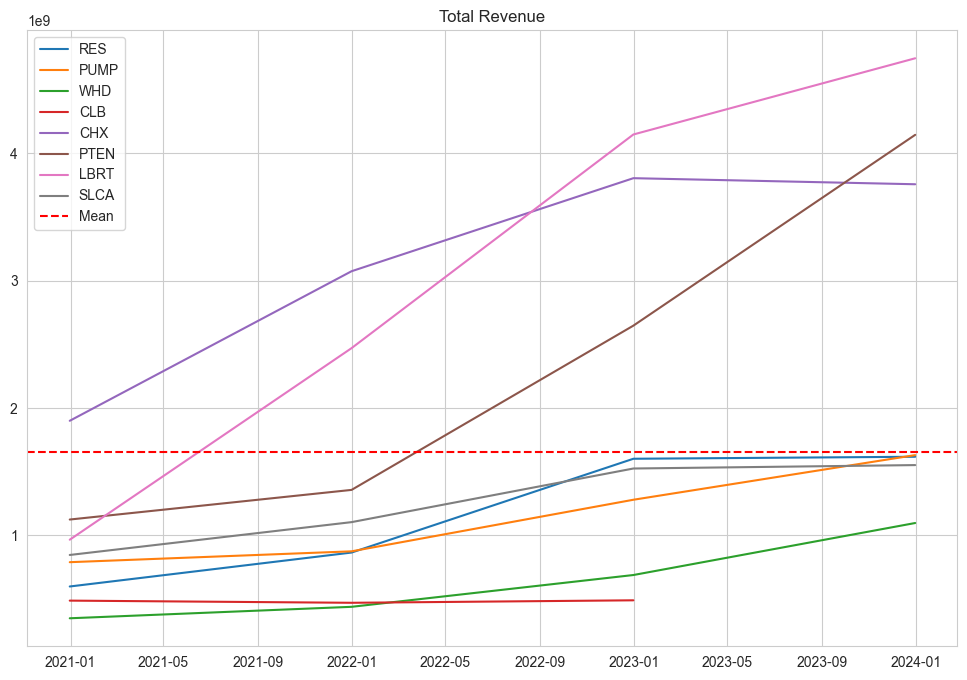

In [14]:
# Plot the revenues
plt.figure(figsize=(12, 8))
for column in revenues_df.columns:
    plt.plot(revenues_df[column], label=column)
plt.title('Total Revenue')
# Put the mean of the revenues in horizontal line
plt.axhline(revenues_df.mean().mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.show()

In [15]:
import yfinance as yf

# Get the stock prices for slca and its peers
# Add SLCA to the peers_tickers list
peers_tickers.append('SLCA')
# Create a dictionary to store the stock prices
stock_prices = {}
for ticker in peers_tickers:
    stock_prices[ticker] = yf.download(ticker, start='2019-01-01', end='2024-04-25')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


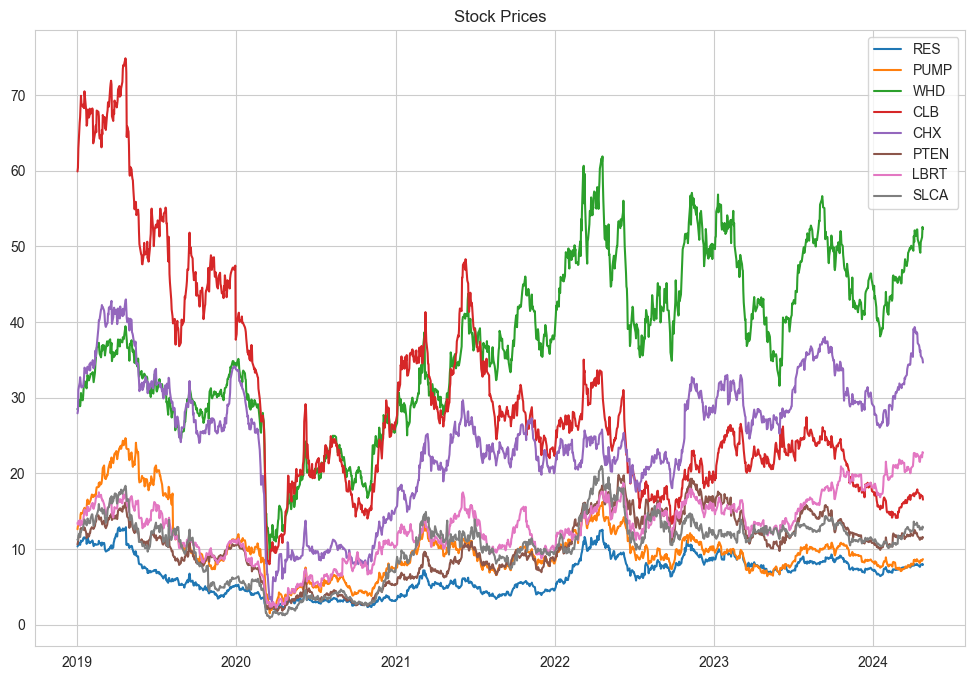

In [16]:
# Graph the closing prices
plt.figure(figsize=(12, 8))
for key in stock_prices.keys():
    plt.plot(stock_prices[key]['Close'], label=key)
plt.title('Stock Prices')
plt.legend()
plt.show()

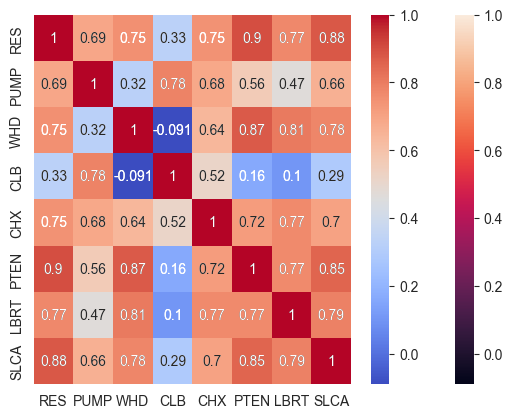

In [17]:
# Check to see if the stock prices of the peers are correlated with a heatmap
stock_prices_df = pd.DataFrame({key: stock_prices[key]['Close'] for key in stock_prices.keys()})
stock_prices_df.head()
sns.heatmap(stock_prices_df.corr(), annot=True)
# Change the color of the heatmap
sns.heatmap(stock_prices_df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [18]:
# Rank the peers that are most correlated with SLCA
stock_prices_df.corr()['SLCA'].sort_values(ascending=False)

SLCA    1.000000
RES     0.879154
PTEN    0.851415
LBRT    0.788039
WHD     0.776349
CHX     0.701937
PUMP    0.662618
CLB     0.290819
Name: SLCA, dtype: float64

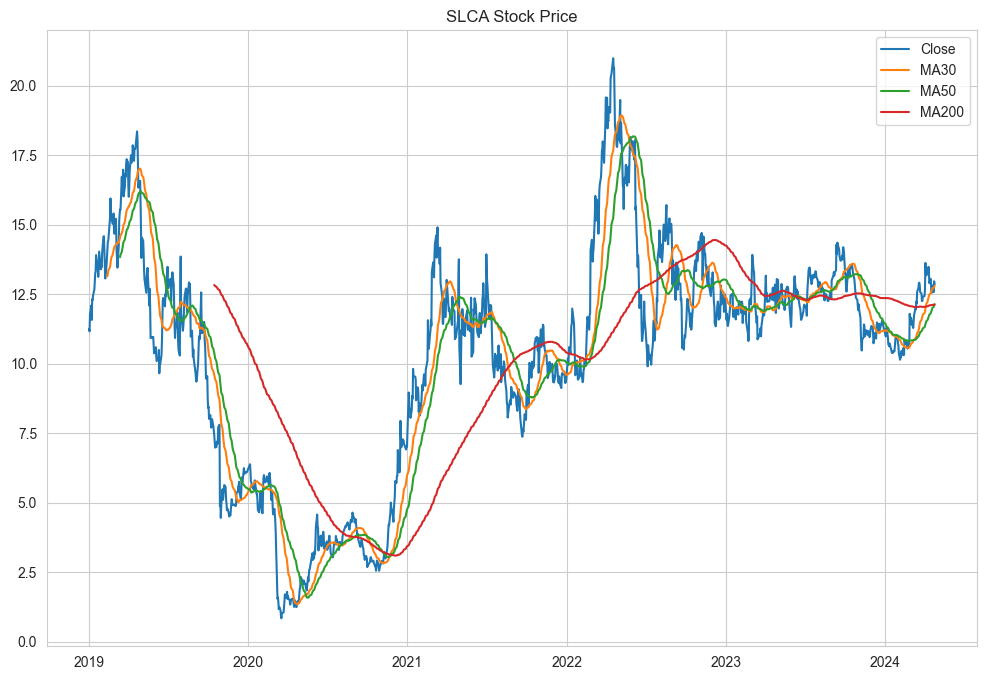

In [19]:
# Calculate the moving average for SLCA stock price
slca_stock = stock_prices['SLCA']
# Add the 30, 50, and 200 day moving averages
slca_stock['MA30'] = slca_stock['Close'].rolling(30).mean()
slca_stock['MA50'] = slca_stock['Close'].rolling(50).mean()
slca_stock['MA200'] = slca_stock['Close'].rolling(200).mean()

# Plot the stock price and the moving averages
plt.figure(figsize=(12, 8))
plt.plot(slca_stock['Close'], label='Close')
plt.plot(slca_stock['MA30'], label='MA30')
plt.plot(slca_stock['MA50'], label='MA50')
plt.plot(slca_stock['MA200'], label='MA200')
plt.title('SLCA Stock Price')
plt.legend()
plt.show()

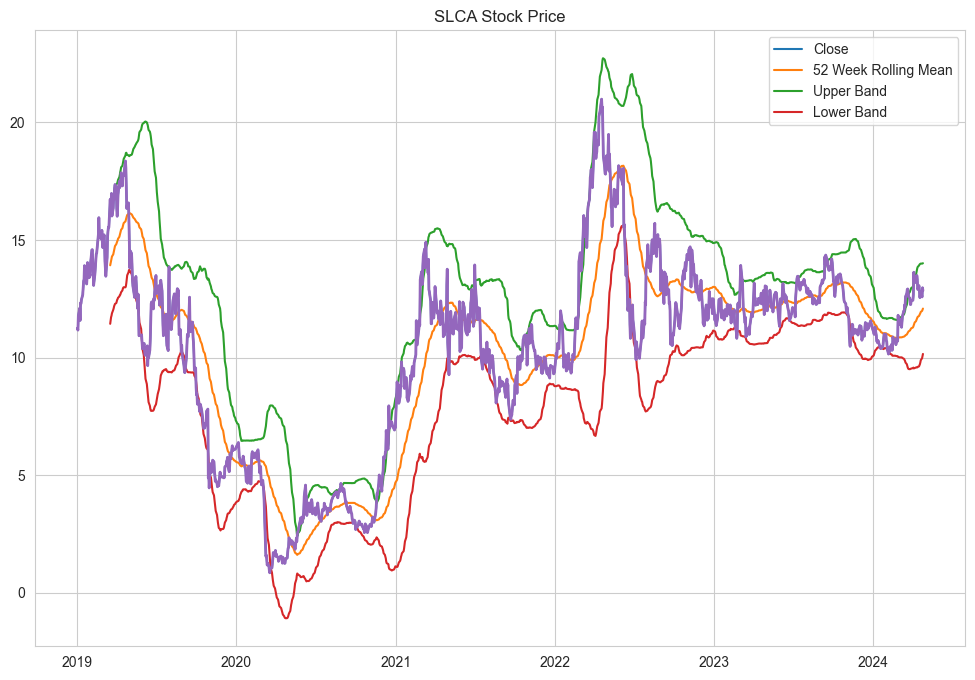

In [20]:
# Compute the 52 weeks rolling mean of the stock price
slca_stock['52 Week Rolling Mean'] = slca_stock['Close'].rolling(52).mean()

# Compute the 52 weeks rolling standard deviation of the stock price
slca_stock['52 Week Rolling STD'] = slca_stock['Close'].rolling(52).std()

# Add the upper bound and lower bound
slca_stock['Upper Band'] = slca_stock['52 Week Rolling Mean'] + (slca_stock['52 Week Rolling STD'] * 2)
slca_stock['Lower Band'] = slca_stock['52 Week Rolling Mean'] - (slca_stock['52 Week Rolling STD'] * 2)

# Plot the stock price and the Bollinger Bands
plt.figure(figsize=(12, 8))
plt.plot(slca_stock['Close'], label='Close')
plt.plot(slca_stock['52 Week Rolling Mean'], label='52 Week Rolling Mean')
plt.plot(slca_stock['Upper Band'], label='Upper Band')
plt.plot(slca_stock['Lower Band'], label='Lower Band')
plt.title('SLCA Stock Price')
# Make the close price a thicker line
plt.plot(slca_stock['Close'], linewidth=2)
plt.legend()
plt.show()

In [21]:
slca_stock.describe()

,Open,High,Low,Close,Adj Close,Volume,MA30,MA50,MA200,52 Week Rolling Mean,52 Week Rolling STD,Upper Band,Lower Band
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1.337000e+03,1308.000000,1288.000000,1138.000000,1286.000000,1286.000000,1286.000000,1286.000000
mean,10.376298,10.667352,10.085333,10.374316,10.299820,1.270895e+06,10.320741,10.276546,9.946527,10.272247,1.168724,12.609694,7.934800
std,4.094680,4.172367,4.004966,4.090402,4.050266,9.588458e+05,3.992953,3.914151,3.399768,3.906363,0.700272,4.516636,3.747316
min,0.910000,1.000000,0.790000,0.850000,0.850000,1.765000e+05,1.364000,1.586000,3.104550,1.613846,0.316018,2.407183,-1.083120
25%,8.450000,8.720000,8.120000,8.420000,8.340000,6.703000e+05,8.467917,8.477800,7.477250,8.441827,0.627770,10.769321,4.950063
50%,11.330000,11.630000,11.030000,11.330000,11.290000,9.906000e+05,11.461667,11.568100,10.792750,11.570577,1.003163,13.292692,9.233663
75%,12.790000,13.040000,12.530000,12.790000,12.730000,1.545500e+06,12.609917,12.683300,12.466712,12.714423,1.505853,14.912759,10.586536
max,20.799999,21.540001,20.549999,20.990000,20.990000,1.264470e+07,18.938333,18.181000,14.454500,18.159808,3.607630,22.727376,15.615223


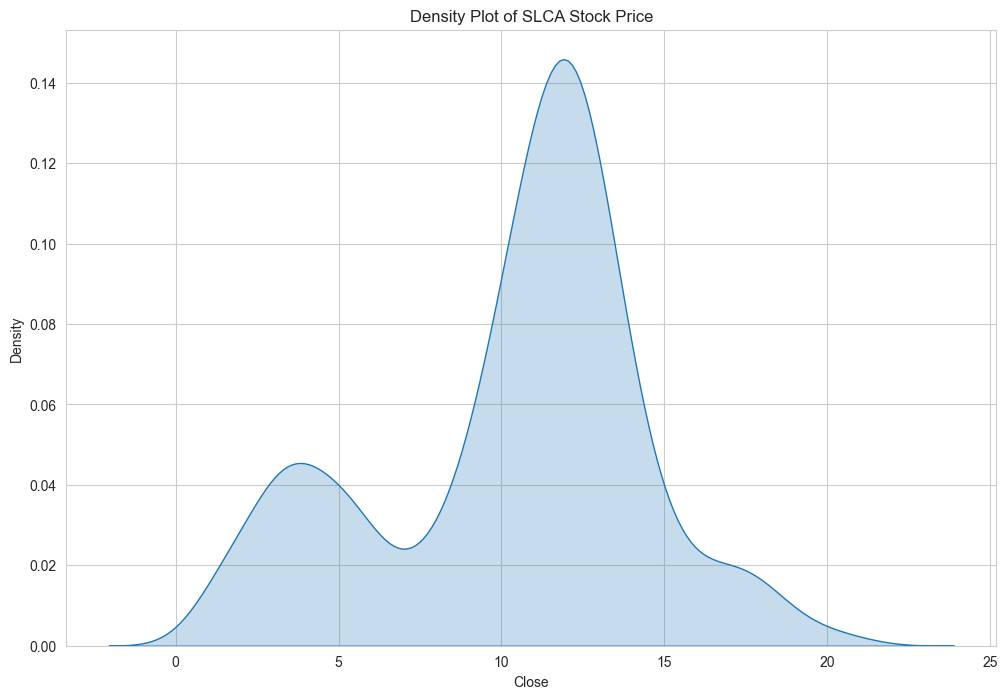

In [22]:
# Create a density plot for the stock price
plt.figure(figsize=(12, 8))
sns.kdeplot(slca_stock['Close'], fill=True)
plt.title('Density Plot of SLCA Stock Price')
plt.show()

In [23]:
from statsmodels.tsa.stattools import adfuller

# Create a dataframe of SLCA returns
slca_stock['Return'] = slca_stock['Close'].pct_change()
slca_stock.dropna(inplace=True)

# Perform the Augmented Dickey-Fuller test
result = adfuller(slca_stock['Return'])
print('ADF Statistic:', result[0])

ADF Statistic: -15.773107757564308
